# Analysis of NHANES Questionnaire Repsonses


In [110]:
#import relevant packages
import json
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy.ma as ma


from fhirclient import client
from fhirclient import server
import fhirclient.models.questionnaire as q
import fhirclient.models.patient as p
import fhirclient.models.humanname as hn
import fhirclient.models.questionnaireresponse as qr


In [111]:
#read in JSON Questionnaire response files for physical activity in bulk:
pa_responses = []
for filename1 in os.listdir('pa_questionnaire_responses'):
    with open("pa_questionnaire_responses/" + filename1, 'r') as qr_file1:
        qrjson1 = json.load(qr_file1)
        pa_qr1 = qr.QuestionnaireResponse(qrjson1)
        pa_responses.append(pa_qr1)
              
#read in JSON Questionnaire response files for mental health in bulk:
mh_responses = []
for filename2 in os.listdir('mh_questionnaire_responses'):
    with open("mh_questionnaire_responses/" + filename2, 'r') as qr_file2:
        qrjson2 = json.load(qr_file2)
        pa_qr2 = qr.QuestionnaireResponse(qrjson2)
        mh_responses.append(pa_qr2)

In [112]:
#pull pysical activity questionnaire response data from SMART model and structure as pandas data frame
pa_arrays = []
for response in pa_responses:
    rowid = response.identifier.value
    #string Null
    row = [rowid, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
    for answers in response.item:
        if answers.linkId == 'PAQ605':
            row[1] = answers.answer[0].valueCoding.code
        if answers.linkId == 'PAQ610':
            row[2] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD615':
            row[3] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ620':
            row[4] = answers.answer[0].valueCoding.code
        if answers.linkId == 'PAQ625':
            row[5] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD630':
            row[6] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ635':
            row[7] = answers.answer[0].valueCoding.code
        if answers.linkId == 'PAQ640':
            row[8] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD645':
            row[9] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ650':
            row[10] = answers.answer[0].valueCoding.code
        if answers.linkId == 'PAQ655':
            row[11] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD660':
            row[12] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ665':
            row[13] = answers.answer[0].valueCoding.code
        if answers.linkId == 'PAQ670':
            row[14] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD675':
            row[15] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD680':
            row[16] = answers.answer[0].valueInteger
    pa_arrays.append(row)

pa_df = pd.DataFrame(pa_arrays, columns =['ID', 'PAQ605', 'PAQ610', 'PAD615', 'PAQ620', 'PAQ625', 'PAD630', 'PAQ635', 'PAQ640', 'PAD645', 'PAQ650', 'PAQ655', 'PAD660', 'PAQ665', 'PAQ670', 'PAD675', 'PAD680']) 
pa_df = pa_df.fillna(value=np.nan)
pa_df["ID"] = pd.to_numeric(pa_df["ID"])
pa_df["PAQ605"] = pd.to_numeric(pa_df["PAQ605"])
pa_df["PAQ620"] = pd.to_numeric(pa_df["PAQ620"])
pa_df["PAQ635"] = pd.to_numeric(pa_df["PAQ635"])
pa_df["PAQ650"] = pd.to_numeric(pa_df["PAQ650"])
pa_df["PAQ665"] = pd.to_numeric(pa_df["PAQ665"])
pa_df.astype('int32', errors='ignore').dtypes
pa_df

,ID,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
0,96696,1.0,5.0,120.0,1.0,5.0,240.0,1.0,2.0,20.0,2.0,NaN,NaN,2.0,NaN,NaN,360.0
1,102554,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,20.0
2,99563,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,120.0
3,99099,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,9999.0
4,99133,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,99632,1.0,5.0,180.0,1.0,5.0,120.0,2.0,NaN,NaN,1.0,2.0,120.0,1.0,3.0,30.0,360.0
5852,100638,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,15.0,30.0
5853,102605,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,480.0
5854,98920,1.0,5.0,480.0,1.0,5.0,480.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,480.0


In [113]:
#pull mental health questionnaire response data from SMART model and structure as pandas data frame
mh_arrays = []
for response in mh_responses:
    rowid = response.identifier.value
    #string Null
    row = [rowid, None, None, None, None, None, None, None, None, None, None]
    if response.item != None:
        for answers in response.item:
            if answers.linkId == 'DPQ010':
                row[1] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ020':
                row[2] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ030':
                row[3] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ040':
                row[4] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ050':
                row[5] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ060':
                row[6] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ070':
                row[7] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ080':
                row[8] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ090':
                row[9] = answers.answer[0].valueCoding.code
            if answers.linkId == 'DPQ100':
                row[10] = answers.answer[0].valueCoding.code
    mh_arrays.append(row)

mh_df = pd.DataFrame(mh_arrays, columns =['ID', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']) 
mh_df = mh_df.fillna(value=np.nan)
mh_df["ID"] = pd.to_numeric(mh_df["ID"])
mh_df["DPQ010"] = pd.to_numeric(mh_df["DPQ010"])
mh_df["DPQ020"] = pd.to_numeric(mh_df["DPQ020"])
mh_df["DPQ030"] = pd.to_numeric(mh_df["DPQ030"])
mh_df["DPQ040"] = pd.to_numeric(mh_df["DPQ040"])
mh_df["DPQ050"] = pd.to_numeric(mh_df["DPQ050"])
mh_df["DPQ060"] = pd.to_numeric(mh_df["DPQ060"])
mh_df["DPQ070"] = pd.to_numeric(mh_df["DPQ070"])
mh_df["DPQ080"] = pd.to_numeric(mh_df["DPQ080"])
mh_df["DPQ090"] = pd.to_numeric(mh_df["DPQ090"])
mh_df["DPQ100"] = pd.to_numeric(mh_df["DPQ100"])
mh_df.astype('int32', errors='ignore').dtypes
mh_df

,ID,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,96696,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0
1,102554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99563,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,99099,1.0,3.0,3.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0
4,99133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5528,94450,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
5529,99632,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5530,100638,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531,102605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [114]:
#load demographic data
for filename1 in os.listdir('nhanes_data'):
    with open("nhanes_data/demographic_data.csv", 'r') as demo1:
        demo_df = pd.read_csv(demo1)

demo_df = demo_df.rename(columns={'seqn': 'ID'})
demo_df = demo_df.fillna(value=np.nan)
demo_df["ID"] = pd.to_numeric(demo_df["ID"])
demo_df

,Unnamed: 0,ID,sddsrvyr,ridstatr,riagendr,ridageyr,ridagemn,ridreth1,ridreth3,ridexmon,...,dmdhredz,dmdhrmaz,dmdhsedz,wtint2yr,wtmec2yr,sdmvpsu,sdmvstra,indhhin2,indfmin2,indfmpir
0,1,93703,10,2,2,2,NaN,5,6,2.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2,145,15.0,15.0,5.00
1,2,93704,10,2,1,2,NaN,3,3,1.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1,143,15.0,15.0,5.00
2,3,93705,10,2,2,66,NaN,4,4,2.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2,145,3.0,3.0,0.82
3,4,93706,10,2,1,18,NaN,5,6,2.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2,134,NaN,NaN,NaN
4,5,93707,10,2,1,13,NaN,5,7,2.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1,138,10.0,10.0,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,9250,102952,10,2,2,70,NaN,5,6,2.0,...,2.0,1.0,1.0,16896.276203,18338.711104,2,138,4.0,4.0,0.95
9250,9251,102953,10,2,1,42,NaN,1,1,2.0,...,2.0,2.0,NaN,61630.380013,63661.951573,2,137,12.0,12.0,NaN
9251,9252,102954,10,2,2,41,NaN,4,4,1.0,...,2.0,2.0,NaN,17160.895269,17694.783346,1,144,10.0,10.0,1.18
9252,9253,102955,10,2,2,14,NaN,4,4,2.0,...,2.0,1.0,2.0,14238.445922,14871.839636,1,136,9.0,9.0,2.24


In [115]:
#merge demographics data with PAQ and DPQ dataframes and add age grouped column:

#for paq
pa_demo_df = pa_df.merge(demo_df, on='ID', how='left')
#stratify by age
pa_demo_df.loc[pa_demo_df['ridageyr'] <= 10, 'Age_Group'] = '0-10' 
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 10) & (pa_demo_df['ridageyr'] <= 20)), 'Age_Group'] = '11-20'
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 20) & (pa_demo_df['ridageyr'] <= 30)), 'Age_Group'] = '21-30'
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 30) & (pa_demo_df['ridageyr'] <= 40)), 'Age_Group'] = '31-40'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 40) & (pa_demo_df['ridageyr'] <= 50)), 'Age_Group'] = '41-50'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 50) & (pa_demo_df['ridageyr'] <= 60)), 'Age_Group'] = '51-60'
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 60) & (pa_demo_df['ridageyr'] <= 70)), 'Age_Group'] = '61-70' 
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 70) & (pa_demo_df['ridageyr'] <= 80)), 'Age_Group'] = '71-80' 
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 80) & (pa_demo_df['ridageyr'] <= 90)), 'Age_Group'] = '81-90'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 90) & (pa_demo_df['ridageyr'] <= 100)), 'Age_Group'] = '91-100'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 100) & (pa_demo_df['ridageyr'] <= 110)), 'Age_Group'] = '101-110'  
#print output   
pa_demo_df


#for dpq
mh_demo_df = mh_df.merge(demo_df, on='ID', how='left')
#stratify by age
mh_demo_df.loc[mh_demo_df['ridageyr'] <= 10, 'Age_Group'] = '0-10' 
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 10) & (mh_demo_df['ridageyr'] <= 20)), 'Age_Group'] = '11-20'
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 20) & (mh_demo_df['ridageyr'] <= 30)), 'Age_Group'] = '21-30'
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 30) & (mh_demo_df['ridageyr'] <= 40)), 'Age_Group'] = '31-40'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 40) & (mh_demo_df['ridageyr'] <= 50)), 'Age_Group'] = '41-50'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 50) & (mh_demo_df['ridageyr'] <= 60)), 'Age_Group'] = '51-60'
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 60) & (mh_demo_df['ridageyr'] <= 70)), 'Age_Group'] = '61-70' 
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 70) & (mh_demo_df['ridageyr'] <= 80)), 'Age_Group'] = '71-80' 
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 80) & (mh_demo_df['ridageyr'] <= 90)), 'Age_Group'] = '81-90'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 90) & (mh_demo_df['ridageyr'] <= 100)), 'Age_Group'] = '91-100'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 100) & (mh_demo_df['ridageyr'] <= 110)), 'Age_Group'] = '101-110'
#print output
mh_demo_df


,ID,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,dmdhrmaz,dmdhsedz,wtint2yr,wtmec2yr,sdmvpsu,sdmvstra,indhhin2,indfmin2,indfmpir,Age_Group
0,96696,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,...,3.0,NaN,19067.779471,19536.314548,2,135,4.0,4.0,0.72,11-20
1,102554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,34564.401851,33123.825915,1,135,6.0,6.0,1.34,61-70
2,99563,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,NaN,21657.512521,24869.955984,1,144,77.0,77.0,NaN,51-60
3,99099,1.0,3.0,3.0,3.0,1.0,0.0,3.0,0.0,0.0,...,2.0,NaN,14782.719547,14190.513923,2,137,6.0,6.0,1.64,41-50
4,99133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,NaN,37414.390590,39692.573371,1,145,5.0,5.0,1.68,71-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,94450,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,...,3.0,NaN,69523.436200,71155.451746,2,135,7.0,7.0,1.36,21-30
5529,99632,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,65503.049774,78125.730356,2,141,15.0,15.0,5.00,11-20
5530,100638,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,27438.863757,29404.213568,1,148,12.0,12.0,NaN,41-50
5531,102605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,16809.506293,21044.522688,1,138,6.0,6.0,1.85,51-60


In [116]:
#group datasets by age group for visualization:

#for PAQ
pa_df_grouped = pa_demo_df.groupby('Age_Group').agg('mean')
pa_df_grouped = pa_df_grouped[['PAQ605', 'PAQ610', 'PAD615', 'PAQ620', 'PAQ625', 'PAD630', 'PAQ635', 'PAQ640', 'PAD645', 'PAQ650', 'PAQ655', 'PAD660', 'PAQ665', 'PAQ670', 'PAD675', 'PAD680']]
pa_df_grouped

#for DPQ
mh_df_grouped = mh_demo_df.groupby('Age_Group').agg('mean')
mh_df_grouped = mh_df_grouped[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']]
mh_df_grouped


,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
Age_Group,,,,,,,,,,
11-20,0.370968,0.290323,0.683871,0.751613,0.416129,0.274194,0.306452,0.174194,0.051613,0.291480
21-30,0.373626,0.343407,0.635989,0.760989,0.467033,0.295330,0.267857,0.159341,0.065934,0.284069
31-40,0.360434,0.333333,0.579946,0.760163,0.395664,0.245257,0.280488,0.159892,0.043419,0.323108
41-50,0.390177,0.406548,0.627558,0.751705,0.403820,0.270123,0.272851,0.155525,0.058663,0.331276
51-60,0.467045,0.372727,0.700000,0.782955,0.387500,0.273038,0.293515,0.184300,0.051195,0.378472
61-70,0.415598,0.387821,0.659188,0.708021,0.378610,0.247059,0.262032,0.201070,0.072727,0.342246
71-80,0.383615,0.332031,0.647135,0.819010,0.367188,0.204427,0.242188,0.208333,0.079427,0.316206


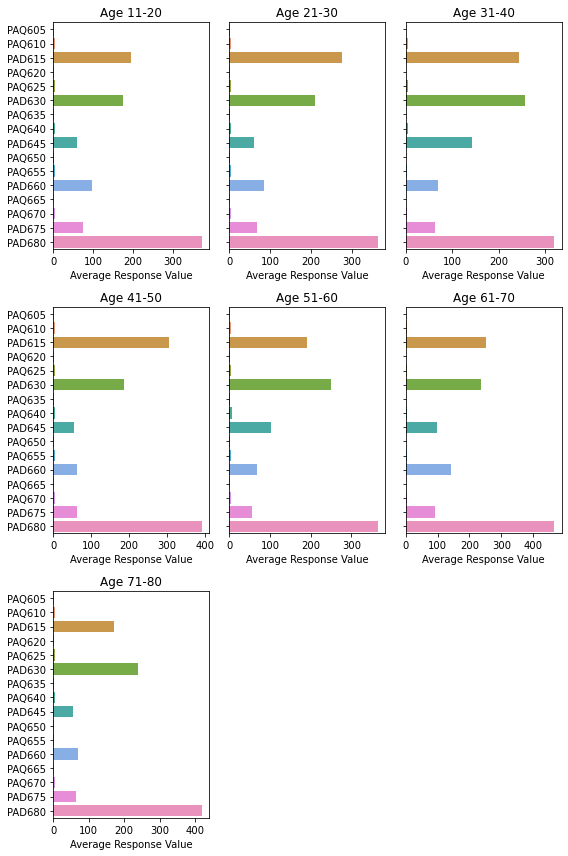

In [117]:
#visualize physical activity age stratified average responses:

def plot_by_age_group(groupby_count_obj, age_group, ax=None):    
    sns.barplot(y = groupby_count_obj.loc[age_group].index, 
                x = groupby_count_obj.loc[age_group].values, 
                ax = ax
                ).set_title("Age {}".format(age_group))

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 12), sharey=True)
for subplot, Age_Group in zip(ax.flatten(), list(pa_df_grouped.index)):
    plot_by_age_group(pa_df_grouped, Age_Group, ax=subplot)
    subplot.set(xlabel='Average Response Value')

plt.delaxes(ax[2,1])
plt.delaxes(ax[2,2])    
    
plt.tight_layout()
plt.savefig('Physical_Activity_Age_Stratified_Viz.png')


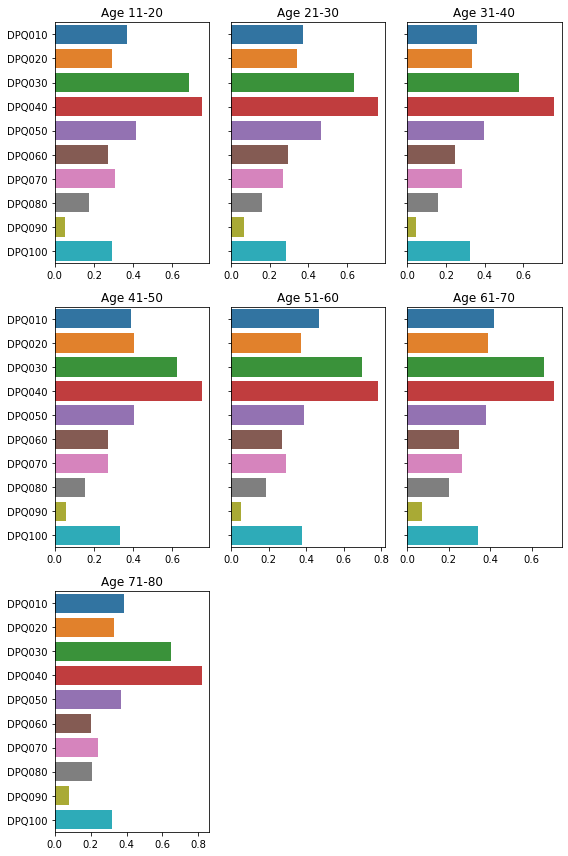

In [118]:
#visualize mental health age stratified average responses:

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 12), sharey=True)
for subplot, Age_Group in zip(ax.flatten(), list(mh_df_grouped.index)):
    plot_by_age_group(mh_df_grouped, Age_Group, ax=subplot)
    
plt.delaxes(ax[2,1])
plt.delaxes(ax[2,2])   
    
plt.tight_layout()
plt.savefig('Mental_Health_Depression_Age_Stratified_Viz.png')


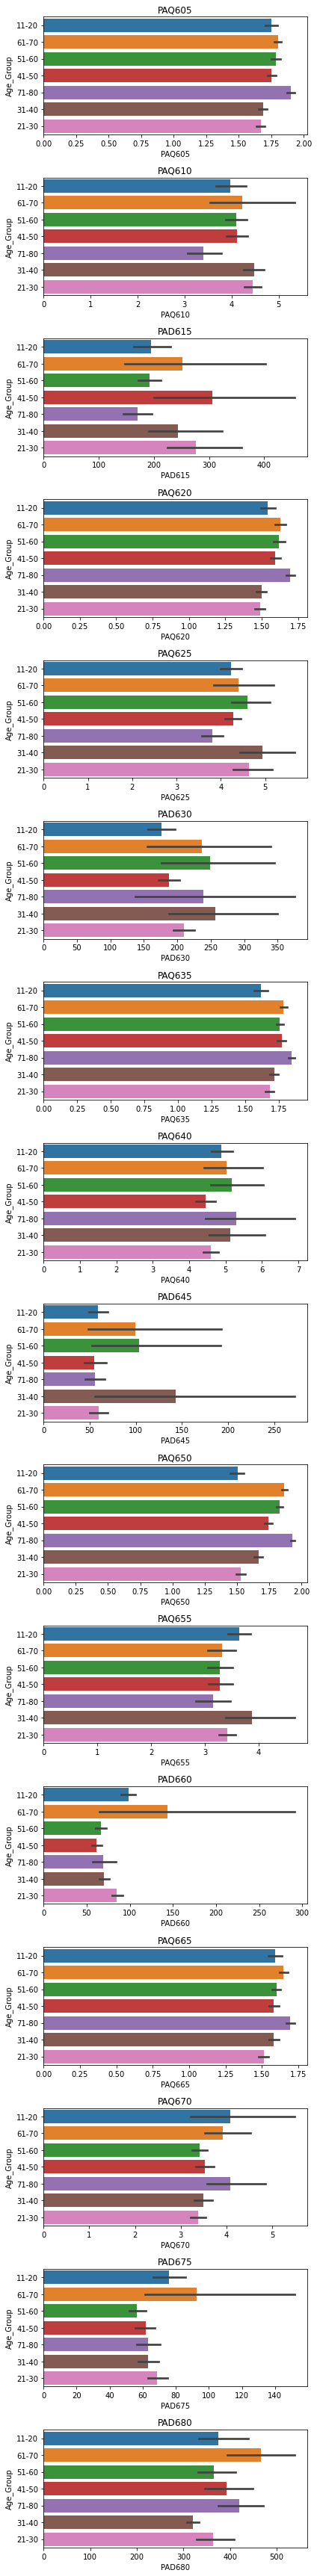

In [119]:
# add string value set option given the integer response and visualize for relevant questions:

#for PAQ questions
pa_vis_data = pa_demo_df[['PAQ605', 'PAQ610', 'PAD615', 'PAQ620', 'PAQ625', 'PAD630', 'PAQ635', 'PAQ640', 'PAD645', 'PAQ650', 'PAQ655', 'PAD660', 'PAQ665', 'PAQ670', 'PAD675', 'PAD680', 'Age_Group']]
n=len(pa_vis_data.columns) - 1
fig,ax = plt.subplots(n,1, figsize=(6,n*3))
for i in range(n):
    plt.sca(ax[i])
    col = pa_vis_data.columns[i]
    sns.barplot(data = pa_vis_data, x = pa_vis_data[col], y = pa_vis_data['Age_Group']).set_title(col)

plt.tight_layout()


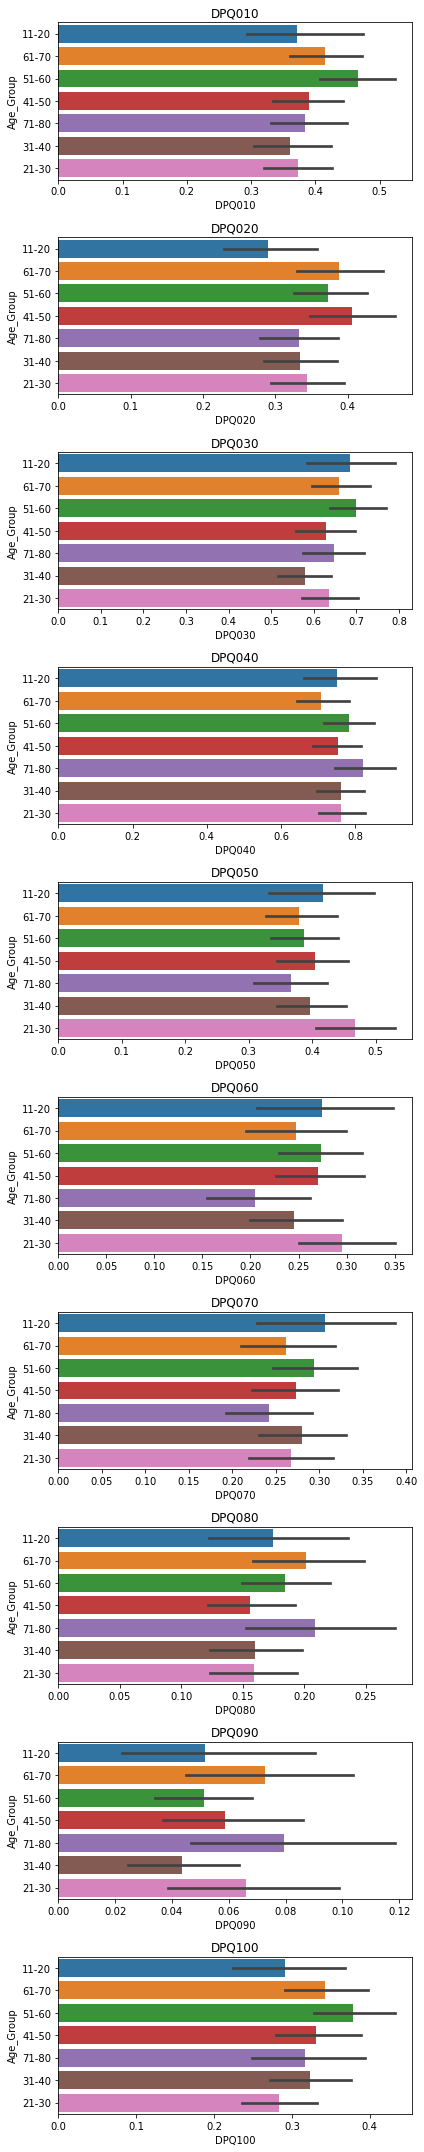

In [120]:
#for DPQ questions
mh_vis_data = mh_demo_df[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'Age_Group']]
n=len(mh_vis_data.columns) - 1
fig,ax = plt.subplots(n,1, figsize=(6,n*3))
for i in range(n):
    plt.sca(ax[i])
    col = mh_vis_data.columns[i]
    sns.barplot(data = mh_vis_data, x = mh_vis_data[col], y = mh_vis_data['Age_Group']).set_title(col)

plt.tight_layout()


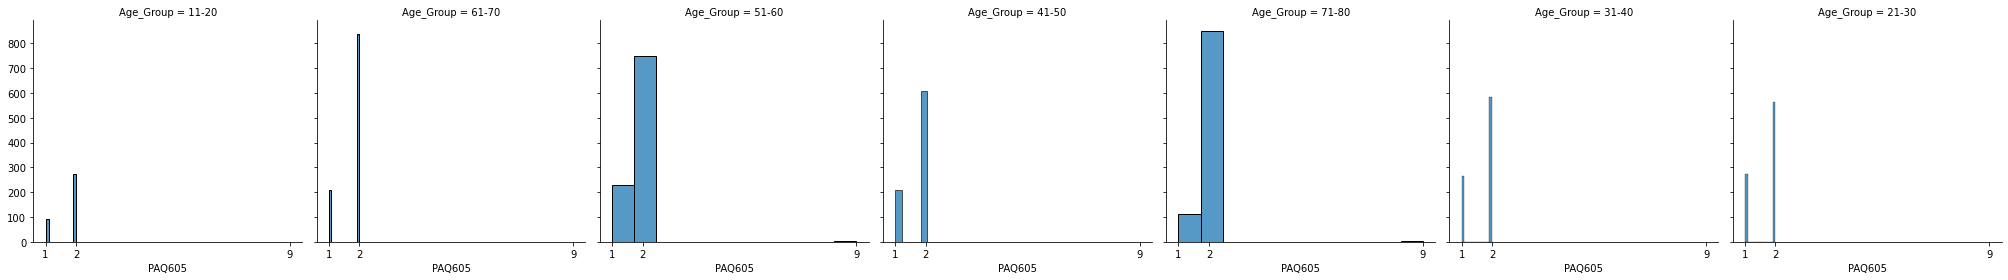

In [121]:

#n=len(pa_vis_data.columns) - 1
#fig,ax = plt.subplots(n,1, figsize=(6,n*3))
#for i in range(n):
    #plt.sca(ax[i])
    #col = pa_vis_data.columns[i]
    
labels, counts = np.unique(pa_vis_data["PAQ605"], return_counts=True)
g = sns.FacetGrid(pa_vis_data, col="Age_Group", height=4)
g.map(sns.histplot, "PAQ605")
plt.gca().set_xticks(labels)



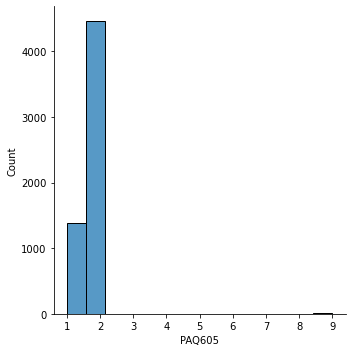

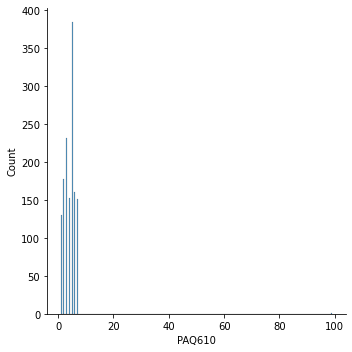

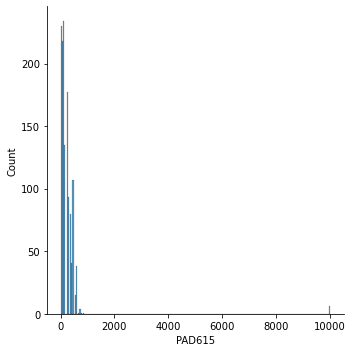

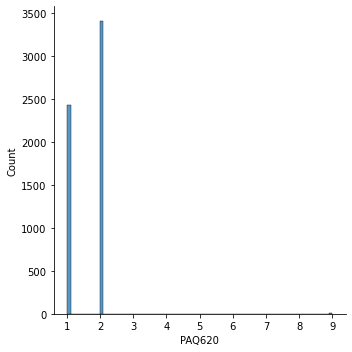

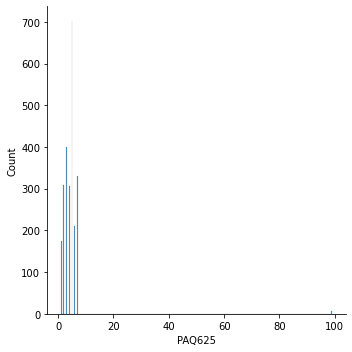

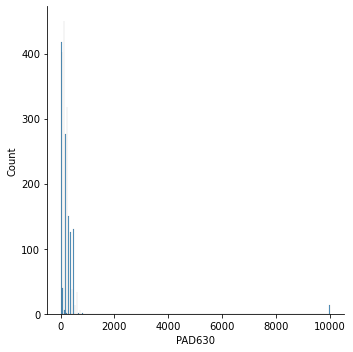

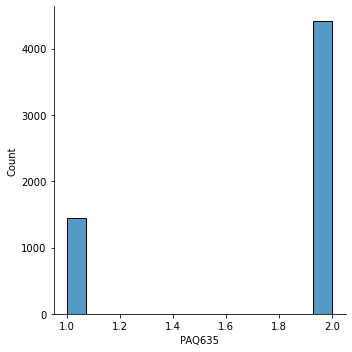

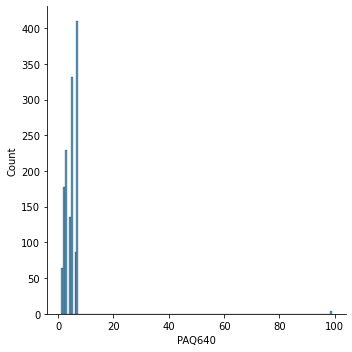

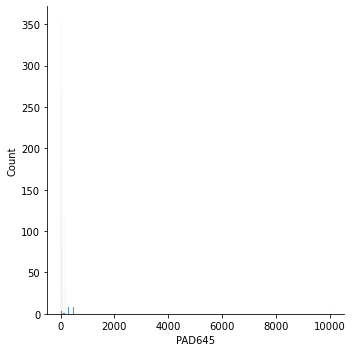

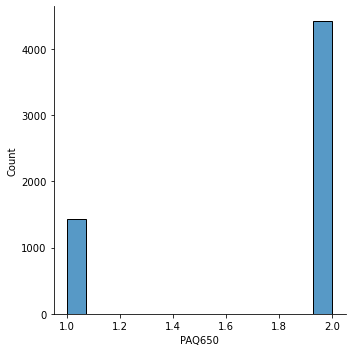

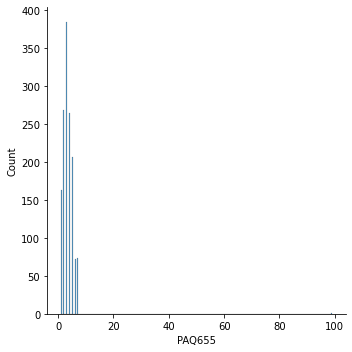

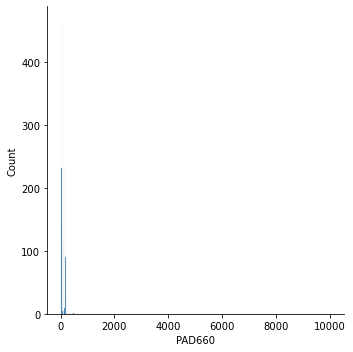

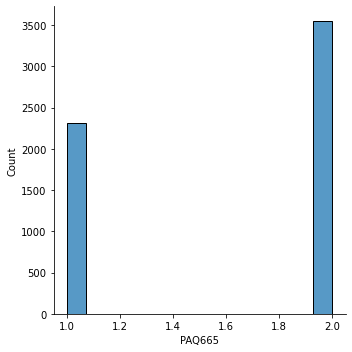

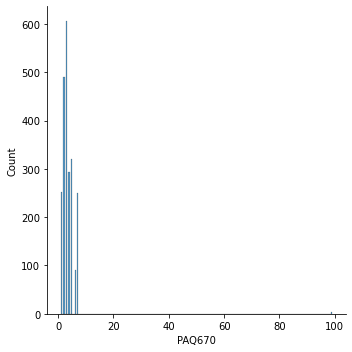

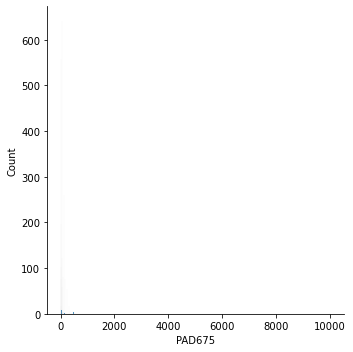

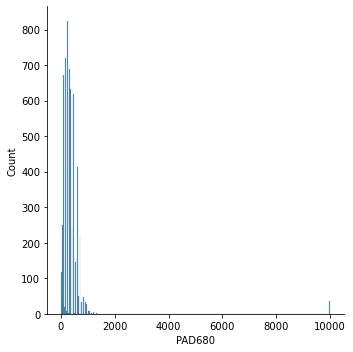

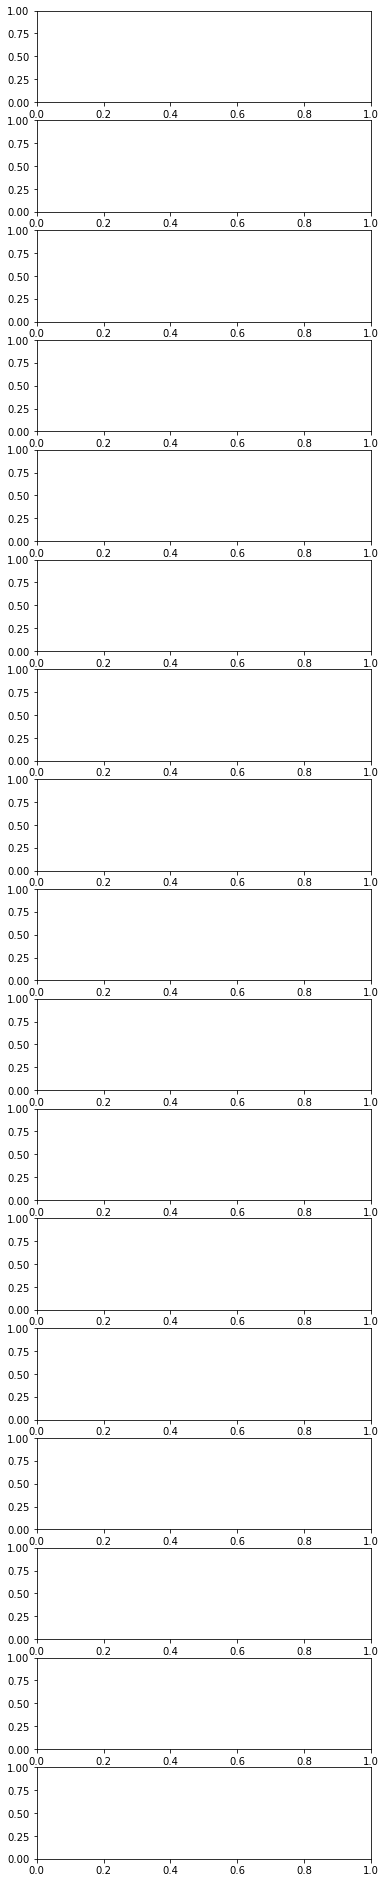

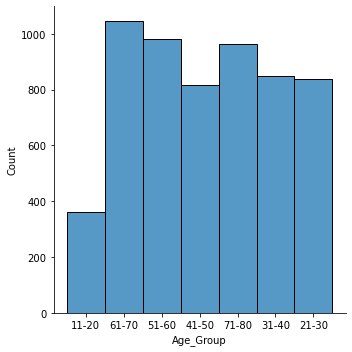

In [122]:
#visualize physical activity responses:
n=len(pa_vis_data.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*2))
for i in range(n):
    plt.sca(ax[i])
    col = pa_vis_data.columns[i]
    sns.displot(pa_vis_data[col])


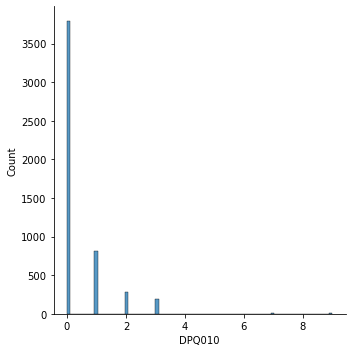

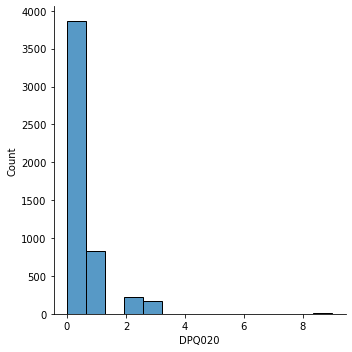

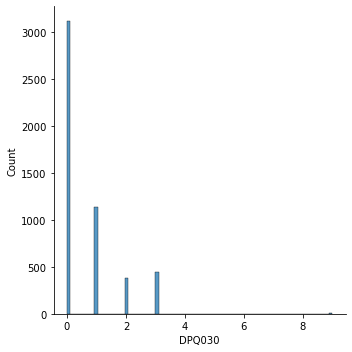

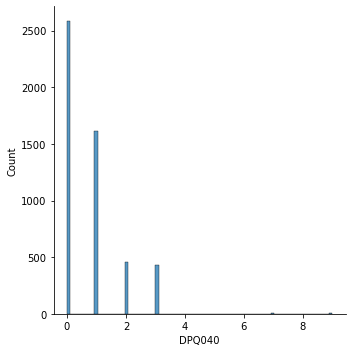

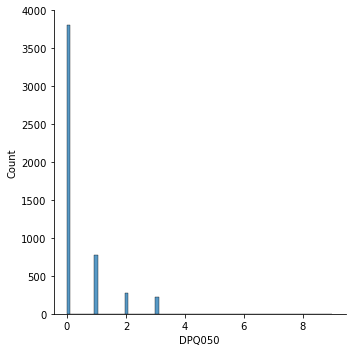

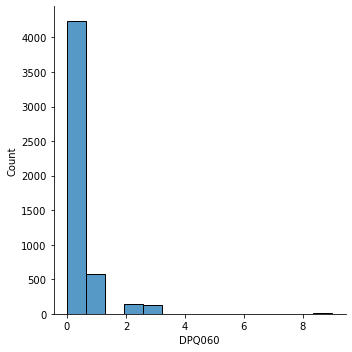

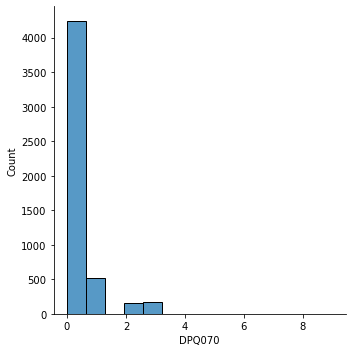

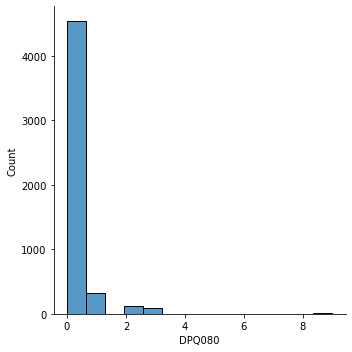

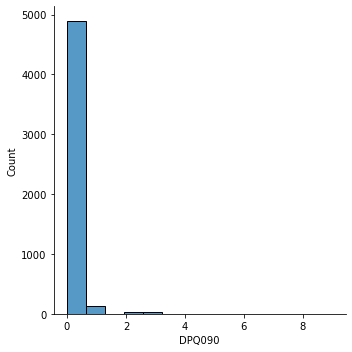

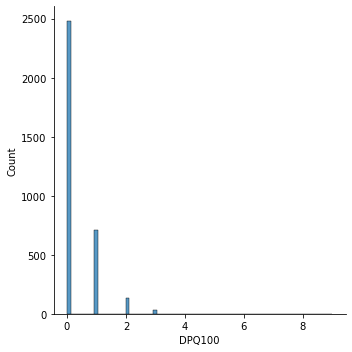

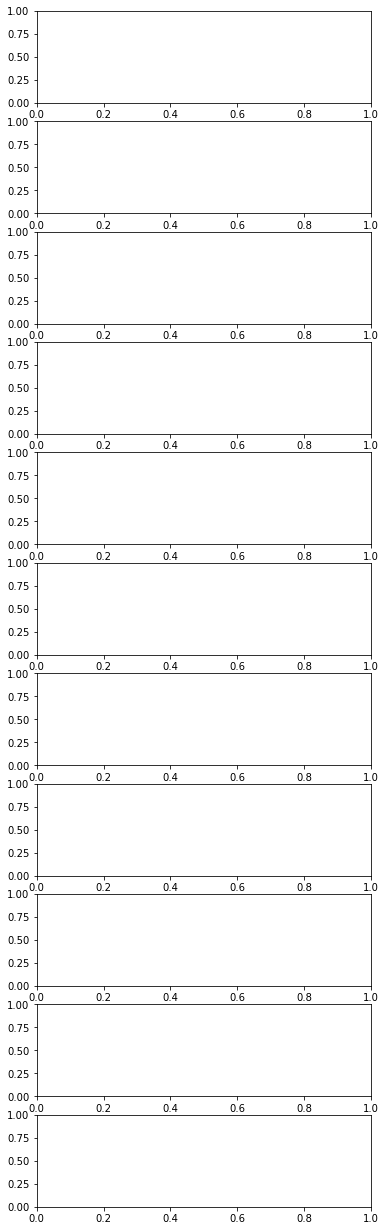

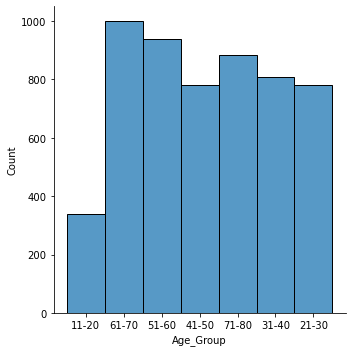

In [123]:
#visualize mental health responses:
n=len(mh_vis_data.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*2))
for i in range(n):
    plt.sca(ax[i])
    col = mh_vis_data.columns[i]
    sns.displot(mh_vis_data[col])
    

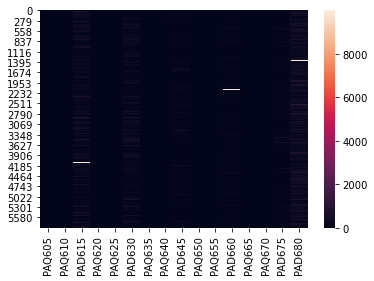

In [124]:
#heatmap of physical activity responses
pa_mat = pa_df.drop(['ID'], axis=1)
plt1 = sns.heatmap(pa_mat, mask=pa_mat.isnull())


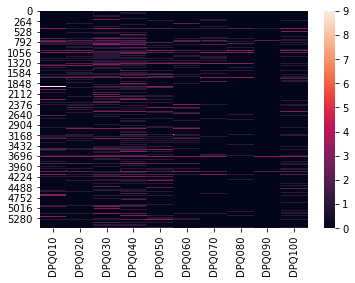

In [125]:
#heatmap of mental health responses
mh_mat = mh_df.drop(['ID'], axis=1)
plt2 = sns.heatmap(mh_mat, mask=mh_mat.isnull())


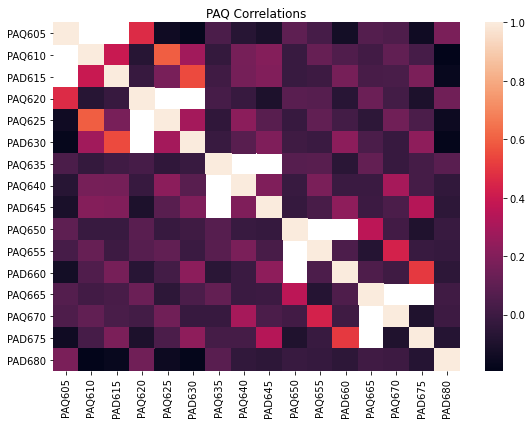

In [126]:
#PAQ correlations
corr_matrix = pa_demo_df[['PAQ605', 'PAQ610', 'PAD615', 'PAQ620', 'PAQ625', 'PAD630', 'PAQ635', 'PAQ640', 'PAD645', 'PAQ650', 'PAQ655', 'PAD660', 'PAQ665', 'PAQ670', 'PAD675', 'PAD680']].corr(method='spearman')
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix)
plt.title("PAQ Correlations")
plt.tight_layout()
plt.show()


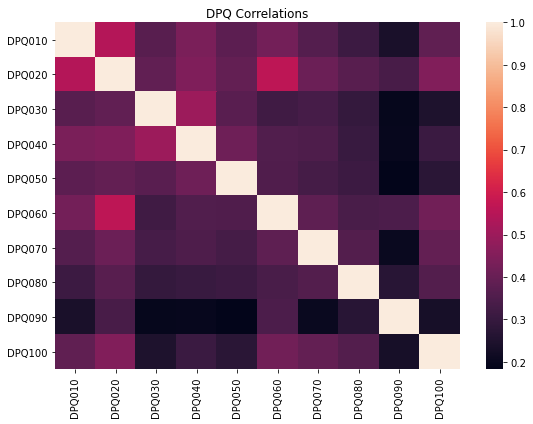

In [127]:
#DPQ correlations
corr_matrix = mh_demo_df[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']].corr(method='spearman')
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix)
plt.title("DPQ Correlations")
plt.tight_layout()
plt.show()
